Installing dependencies
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
(kuch glt bhi ho sakta check in copilot GPU REMOVED)

# INSTALL DEPENDENCIES AND SETTING GPU LIMITED

In [144]:
import tensorflow as tf   # type: ignore #type ignore
import os



In [145]:
gpus = tf.config.experimental.list_physical_devices('CPU')


In [146]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [147]:
# BEGIN: Set GPU memory consumption growth
# so that not all GPU memory is allocated at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# END: Set GPU memory consumption growth

# Remove dodgy images

In [148]:
import cv2 #type: ignore
import imghdr
import matplotlib.pyplot as plt     # type: ignore

In [149]:
data_dir = r'D:\College Minor Project\Wasification\data2'
os.listdir(data_dir)

['can', 'glass', 'paper', 'plastic', 'plastic_bag', 'styrofoam']

In [150]:
# Load the image
img=cv2.imread(os.path.join(data_dir, 'can', 'IMG_8482.jpeg'))

In [151]:
if img is not None:
    print(img.shape)
else:
    print("Failed to load image.")


(3024, 4032, 3)


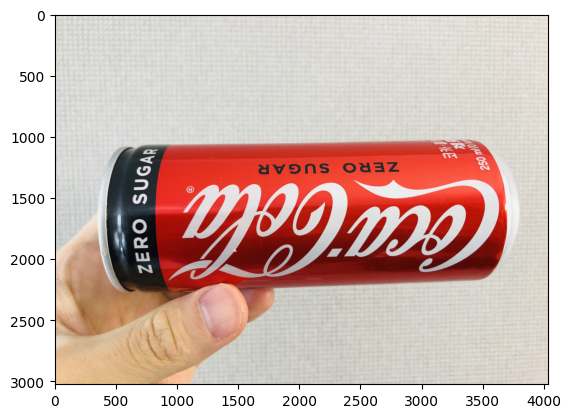

In [152]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#fixing colors alos

In [153]:
image_exts = ['jpg','jpeg','png','bmp'] # list of valid image extensions

In [154]:
image_exts[0] #accessing the first element of the list

'jpg'

In [155]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
       image_path = os.path.join(data_dir,image_class,image)
       try:
           img=cv2.imread(image_path)
           tip=imghdr.what(image_path)
           if tip not in image_exts:
               print(f'image not in ext list {image_path}')
               os.remove(image_path)
       except Exception as e:
            print(f'Error processing image {image_path} {e}')
            os.remove(image_path)     

#deleted the images which are not in the list of image_exts  

# Load Data

In [156]:
import numpy as np #type: ignore
from matplotlib import pyplot as plt #type: ignore

In [218]:
#streamline process and automatically labels
# now going to load data ,this util will shuffle resize and batch the data and also will preprocess the data
data=tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=282) 
#use comma and you can change batch size and image size

Found 282 files belonging to 6 classes.


In [219]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [220]:
#checking each data or iterating through the data 
# allowing us to acces the data as numpy array and as data pipeline
#iterator at previous and batch as next

data_iterator=data.as_numpy_iterator()


In [221]:
#get another batch
batch=data_iterator.next()

In [222]:
len(batch)
#two parts one as data and other as labels (image representation )


2

In [223]:
batch[0]

array([[[[193.48828  , 177.26953  , 172.67578  ],
         [217.94922  , 204.94922  , 196.94922  ],
         [213.17188  , 200.17188  , 194.17188  ],
         ...,
         [190.00781  , 179.07031  , 175.03906  ],
         [187.59766  , 172.03516  , 171.8164   ],
         [179.2461   , 167.02734  , 164.2461   ]],

        [[204.       , 190.1875   , 182.59375  ],
         [165.03125  , 150.03125  , 145.03125  ],
         [196.57422  , 181.57422  , 176.57422  ],
         ...,
         [213.77344  , 202.77344  , 200.77344  ],
         [197.03516  , 181.03516  , 181.03516  ],
         [186.90234  , 175.90234  , 172.71484  ]],

        [[190.13672  , 180.13672  , 171.13672  ],
         [203.92578  , 188.92578  , 183.92578  ],
         [219.42578  , 204.42578  , 199.42578  ],
         ...,
         [183.64062  , 169.64062  , 166.64062  ],
         [187.4414   , 173.4414   , 170.4414   ],
         [184.11719  , 173.11719  , 167.11719  ]],

        ...,

        [[ 46.14453  ,  27.144531 ,  1

In [224]:
#image representation as numpy array
batch[0].shape   # (batch_size, height, width, channels=number of color channels e.g rgb)
#making the size of each image component 

(282, 256, 256, 3)

In [225]:
#in each batch one class get one label 
#here in ours ,class 0 is can and class 1 is glass and class 2 is paper  and class 3 is glass and class 4 is plastic bag 
#class 5 is styrofoam
batch[1]

array([3, 1, 3, 0, 0, 4, 2, 3, 2, 5, 1, 3, 5, 0, 4, 2, 3, 0, 0, 1, 3, 3,
       5, 2, 0, 0, 2, 2, 3, 2, 1, 3, 3, 1, 3, 1, 5, 2, 2, 1, 1, 1, 3, 1,
       3, 3, 1, 1, 1, 0, 3, 3, 3, 1, 1, 2, 3, 4, 1, 3, 2, 1, 5, 1, 2, 3,
       3, 3, 1, 1, 0, 3, 2, 3, 3, 2, 0, 4, 2, 0, 3, 3, 2, 1, 1, 3, 3, 1,
       3, 3, 5, 3, 2, 3, 4, 1, 2, 1, 3, 3, 1, 4, 4, 3, 2, 4, 1, 2, 3, 2,
       4, 3, 1, 3, 4, 4, 4, 1, 2, 3, 4, 4, 3, 4, 1, 3, 3, 1, 1, 3, 4, 1,
       3, 3, 1, 1, 1, 1, 2, 4, 2, 3, 5, 3, 5, 0, 3, 3, 3, 2, 1, 3, 0, 2,
       0, 3, 0, 2, 4, 5, 3, 3, 0, 2, 3, 5, 4, 4, 4, 4, 4, 3, 3, 0, 1, 3,
       2, 1, 3, 2, 3, 1, 2, 2, 0, 2, 1, 1, 4, 1, 3, 2, 4, 3, 4, 4, 0, 0,
       2, 1, 3, 3, 2, 5, 2, 1, 3, 1, 4, 4, 1, 5, 3, 5, 3, 0, 2, 2, 2, 2,
       4, 2, 0, 4, 3, 1, 4, 4, 2, 2, 2, 3, 1, 1, 5, 3, 2, 4, 5, 2, 1, 3,
       2, 4, 1, 5, 1, 1, 1, 1, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 5, 3, 4, 1,
       1, 2, 0, 2, 3, 5, 3, 4, 0, 0, 3, 3, 1, 3, 5, 2, 3, 0])

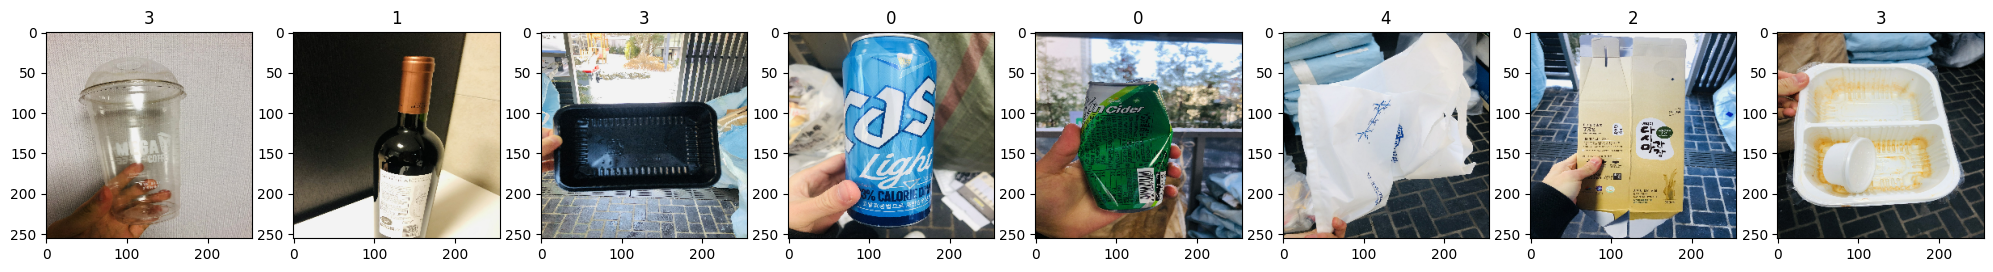

In [226]:
fig,ax =plt.subplots(ncols=8,figsize=(25,25))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))    
    ax[idx].title.set_text(batch[1][idx])


# PRE-PROCESS THE DATA

#scaling the data 

In [227]:
batch[0].min()

0.0

In [228]:
batch[0].max()

255.0

In [229]:
#batch[0] is image part while batch[1] is label 
#converting values from  0 to 1
scaled=batch[0]/255


In [230]:
scaled.min()


0.0

In [231]:
scaled.max()

1.0

In [232]:
#transforming data pipelines
#x represents images while y represents labels
data=data.map(lambda x,y :(x/225,y))

In [233]:
#grabbing first set of images
scaled_iterator=data.as_numpy_iterator()

In [234]:
batch=scaled_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005..1.1093576].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.109566].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333].


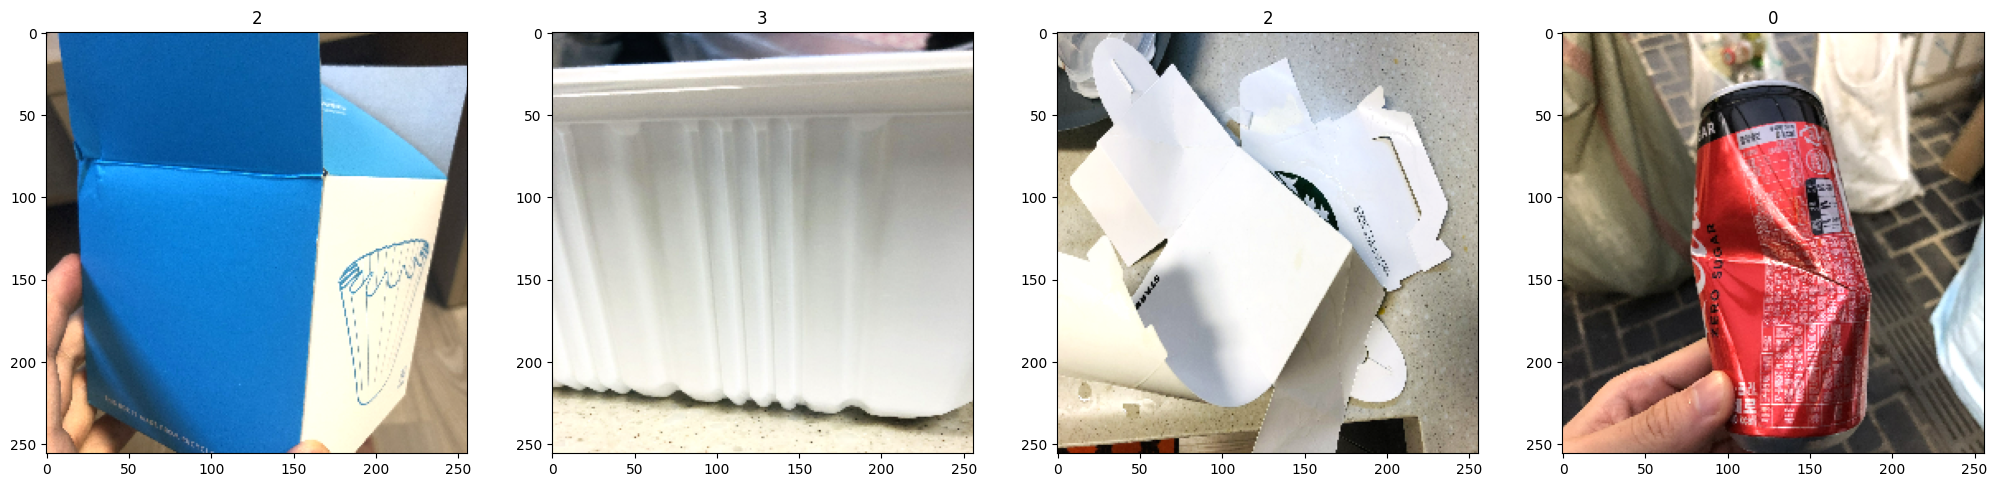

In [235]:
fig,ax =plt.subplots(ncols=4,figsize=(25,25))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) #as astype int will make 0 to 1 value as 0    
    ax[idx].title.set_text(batch[1][idx])


In [236]:
batch[0]

array([[[[3.37816834e-01, 2.96506077e-01, 2.87855893e-01],
         [5.37873268e-01, 4.75651056e-01, 4.62317705e-01],
         [6.90420985e-01, 6.28029525e-01, 5.82808137e-01],
         ...,
         [1.71970487e-01, 1.31970480e-01, 1.00859374e-01],
         [1.81250006e-01, 1.41249999e-01, 1.10138886e-01],
         [1.67478293e-01, 1.27478302e-01, 9.63671878e-02]],

        [[4.44496542e-01, 4.00308162e-01, 3.85234386e-01],
         [6.72500014e-01, 5.96944451e-01, 5.52500010e-01],
         [7.11111128e-01, 6.35555565e-01, 5.91111124e-01],
         ...,
         [1.73055559e-01, 1.33055553e-01, 1.01944447e-01],
         [1.71488717e-01, 1.31488711e-01, 1.00377604e-01],
         [1.66675344e-01, 1.26675352e-01, 9.55642387e-02]],

        [[5.22135437e-01, 4.72274303e-01, 4.34023440e-01],
         [6.78658843e-01, 6.03103280e-01, 5.58658838e-01],
         [7.11384535e-01, 6.35828972e-01, 5.91384530e-01],
         ...,
         [1.69032112e-01, 1.29032120e-01, 9.79210064e-02],
         [

# Spliting the data

In [242]:
#len(data) #number of batches

In [243]:
# train_size=int(0.7*len(data)) 
# val_size=int(0.2*len(data))+1
# test_size=int(0.1*len(data))+1  #so that we dont have any data left

In [244]:
# test_size+val_size+train_size

In [245]:
# train=data.take(train_size)  # data used for training
# val=data.skip(train_size).take(val_size) # data used for overfitting and models
# test=data.skip(train_size+val_size).take(test_size) #data used for testing
#how much data to take from each


# Creating Data Frames

In [246]:
import pandas as pd  #type: ignore
from tabulate import tabulate # type: ignore

In [247]:
images = np.array(batch[0])
labels = np.array(batch[1])

In [248]:
images.max()

1.1333333

In [249]:
data = {
    
    'Height': [batch[0][i].shape[0] for i in range(batch[0].shape[0])],
    'Width': [batch[0][i].shape[1] for i in range(batch[0].shape[0])],
    'Red_Channel': [batch[0][i][:, :, 0] for i in range(batch[0].shape[0])],
    'Green_Channel': [batch[0][i][:, :, 1] for i in range(batch[0].shape[0])],
    'Blue_Channel': [batch[0][i][:, :, 2] for i in range(batch[0].shape[0])],
    'Label': [batch[1][i] for i in range(batch[1].shape[0])],
}

df = pd.DataFrame(data)
df

,Height,Width,Red_Channel,Green_Channel,Blue_Channel,Label
0,256,256,"[[0.33781683, 0.53787327, 0.690421, 0.72764325...","[[0.29650608, 0.47565106, 0.6280295, 0.6520877...","[[0.2878559, 0.4623177, 0.58280814, 0.62097657...",2
1,256,256,"[[0.37421876, 0.3740278, 0.45152777, 0.465434,...","[[0.36532986, 0.3740278, 0.44263887, 0.4565451...","[[0.3822743, 0.38291666, 0.45597222, 0.4698784...",3
2,256,256,"[[0.72444445, 0.7038021, 0.67685765, 0.6485937...","[[0.6888889, 0.6638021, 0.6457465, 0.61748266,...","[[0.64, 0.63269097, 0.6190799, 0.59081596, 0.6...",2
3,256,256,"[[0.7519835, 0.7838889, 0.79372394, 0.79444444...","[[0.7075391, 0.7261111, 0.7359462, 0.7445833, ...","[[0.55198354, 0.575, 0.58483505, 0.5863889, 0....",0
4,256,256,"[[0.42944443, 0.46597221, 0.49064237, 0.516961...","[[0.7494444, 0.76375, 0.77953124, 0.79251736, ...","[[0.92722225, 0.9504167, 0.957309, 0.9658507, ...",2
...,...,...,...,...,...,...
277,256,256,"[[0.07984375, 0.06458333, 0.058993056, 0.06381...","[[0.07984375, 0.06458333, 0.058993056, 0.06381...","[[0.07095486, 0.055694446, 0.050104167, 0.0549...",1
278,256,256,"[[0.96069443, 0.9693576, 1.002691, 1.0027778, ...","[[0.85305554, 0.8760243, 0.90935767, 0.9094444...","[[0.89402777, 0.9071354, 0.9404687, 0.9405556,...",3
279,256,256,"[[0.13859375, 0.28654513, 0.30434027, 0.406180...","[[0.16081597, 0.28987846, 0.3054514, 0.4061805...","[[0.13137153, 0.24376737, 0.2804514, 0.370625,...",3
280,256,256,"[[0.2961632, 0.26951388, 0.23345487, 0.2706597...","[[0.23394097, 0.20729166, 0.16274306, 0.208437...","[[0.19394097, 0.16729167, 0.12557292, 0.159548...",1


,Features,Labels
0,"[[[1.08, 1.08, 1.0888889], [1.08, 1.08, 1.0888...",3
1,"[[[0.36623263, 0.45595485, 0.47998264], [0.374...",4
2,"[[[0.6167882, 0.6594271, 0.67373264], [0.62980...",2
3,"[[[0.18078125, 0.16395833, 0.10520833], [0.719...",2
4,"[[[0.27788195, 0.22538194, 0.1471875], [0.2559...",1
5,"[[[1.0201389, 1.0072396, 1.0215278], [1.026336...",2
6,"[[[0.6074783, 0.56180555, 0.4650998], [0.65763...",2
7,"[[[0.051475696, 0.07369792, 0.08703125], [0.05...",2
8,"[[[0.061545137, 0.10154514, 0.0971007], [0.066...",3
9,"[[[0.8734375, 0.8328819, 0.7448264], [0.821441...",4


ValueError: Must pass 2-d input. shape=(10, 256, 256, 3)

In [79]:
print(df)

                                                Image  Label
0   [[[82.3515625, 70.3515625, 48.3515625], [86.35...      1
1   [[[237.9921875, 237.9921875, 237.9921875], [24...      2
2   [[[205.78515625, 146.97265625, 110.37890625], ...      3
3   [[[39.328125, 45.328125, 43.328125], [37.40234...      3
4   [[[226.03515625, 217.77734375, 210.40625], [22...      0
5   [[[161.669921875, 142.451171875, 122.857421875...      3
6   [[[155.15234375, 179.15234375, 189.89453125], ...      2
7   [[[136.48046875, 141.07421875, 122.29296875], ...      0
8   [[[227.25, 207.0, 164.375], [227.54296875, 202...      3
9   [[[48.14453125, 61.73828125, 70.73828125], [44...      4
10  [[[203.5078125, 181.5078125, 144.5078125], [20...      3
11  [[[217.375, 214.375, 207.375], [217.85546875, ...      2
12  [[[232.84375, 227.625, 216.4375], [235.375, 22...      1
13  [[[189.59375, 150.1875, 122.40625], [177.88476...      0
14  [[[108.609375, 91.203125, 66.015625], [109.707...      1
15  [[[198.328125, 182.5